## Домашнее задание 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Вам представлены данные об оттоке клиентов некоторого банка.
нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

In [5]:
import pandas as pd
churn_data = pd.read_csv('C:\\Users\\shere\\OneDrive\\Рабочий стол\\MFTI\\Advanced python\\churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Удалим неинформативные признаки и дубликаты
churn_data = churn_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data.drop_duplicates()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)

CustomerId — идентификатор клиента

Surname — фамилия клиента

CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

Geography — страна клиента (банк международный)

Gender — пол клиента

Age — возраст клиента

Tenure — сколько лет клиент пользуется услугами банка

Balance — баланс на счетах клиента в банке

NumOfProducts — количество услуг банка, которые приобрёл клиент

HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

EstimatedSalary — предполагаемая заработная плата клиента

Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

#### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Text(0.5, 1.0, 'Соотношение лояльных и ушедших клиентов')

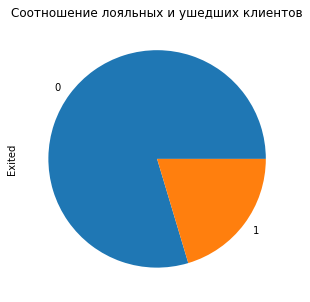

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
churn_data.Exited.value_counts(normalize=True).plot(kind='pie')
axes.set_title('Соотношение лояльных и ушедших клиентов')

Видим, что остается с банком лишь пятая часть от всех клиентов.

#### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

{'whiskers': [<matplotlib.lines.Line2D at 0x15d197b0a30>,
 'caps': [<matplotlib.lines.Line2D at 0x15d197b0fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15d197b0640>],
 'medians': [<matplotlib.lines.Line2D at 0x15d197c55b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15d197c5880>],
 'means': []}

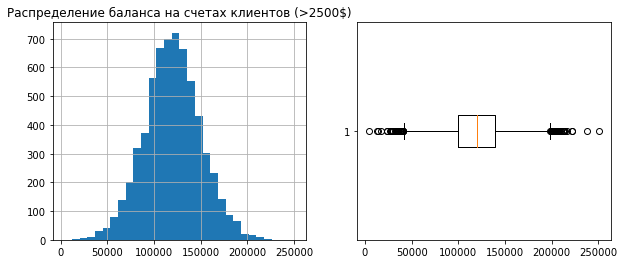

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].hist(x=churn_data[churn_data.Balance > 2500].Balance,
             label='Баланс',
             bins=30,
            )
axes[0].grid()
axes[0].set_title('Распределение баланса на счетах клиентов (>2500$)')
axes[1].boxplot(x=churn_data[churn_data.Balance > 2500].Balance,
                vert=False,
                
               )

Распределение величины баланса от 2500 до максимума выглядит нормальным. Большинство балансов приходится на промежуток от 100 тысяч до 130 тысяч долларов.

#### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

<AxesSubplot:title={'center':'Распределение баланса ушедших клиентов'}, xlabel='Balance', ylabel='Percent'>

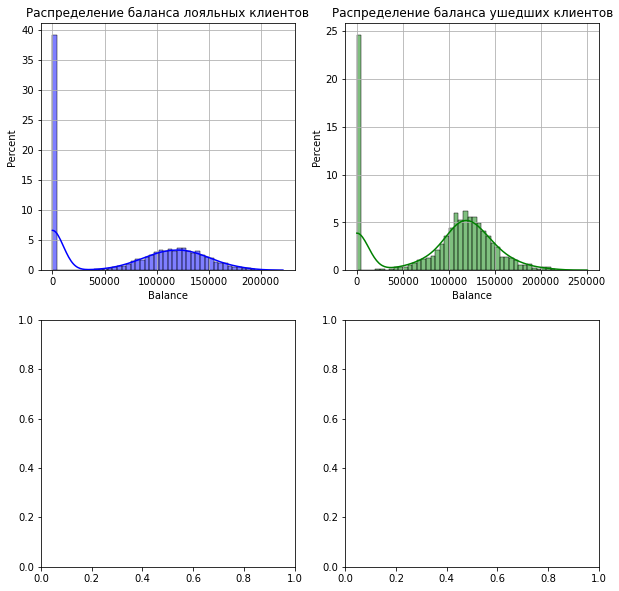

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axes[0,0].grid()
axes[0,0].set_title('Распределение баланса лояльных клиентов')

sns.histplot(
    data=churn_data[(churn_data.Exited == 0)],
    x='Balance',
    bins=50,
    stat='percent',
    kde=True,
    ax=axes[0, 0],
    color='blue'
)

axes[0,1].grid()
axes[0,1].set_title('Распределение баланса ушедших клиентов')
sns.histplot(
    data=churn_data[(churn_data.Exited == 1)],
    x='Balance',
    bins=50,
    stat='percent',
    kde=True,
    ax=axes[0, 1],
    color='green',
)


Видно, что распредление баланса схоже на промежутке выше минимульных порогов. Но околонулевой баланс имеют клиенты с разным разбросом в отношении к банку - 25% ушедших клиентов и 40% оставшихся. Думаю, это может свидетельтвовать об успехе рекламной стратегии банка, которая привлекла людей с низкими балансами и смогла их удержать после конца кампании.


#### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

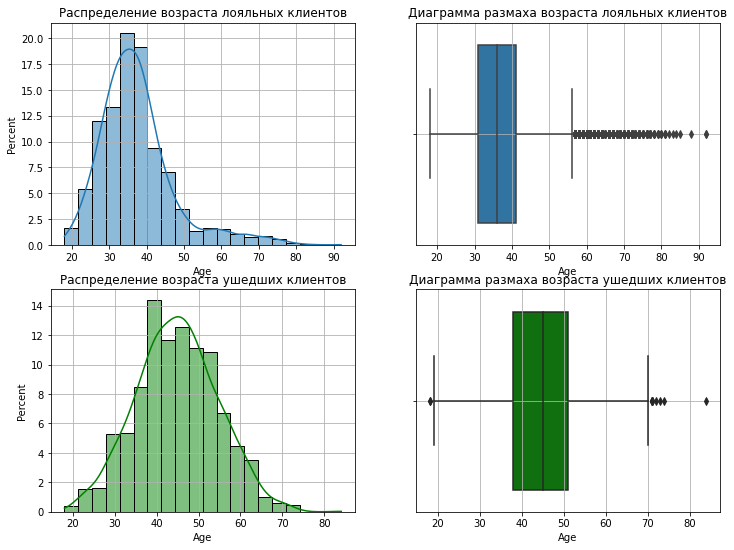

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

sns.histplot(
    data=churn_data[(churn_data.Exited == 0)],
    x='Age',
    bins=20,
    stat='percent',
    kde=True,
    ax=axes[0, 0]
);
axes[0,0].grid()
axes[0,0].set_title('Распределение возраста лояльных клиентов')

sns.boxplot(
    data=churn_data[(churn_data.Exited == 0)],
    x='Age',
    ax=axes[0, 1],
);
axes[0,1].grid()
axes[0,1].set_title('Диаграмма размаха возраста лояльных клиентов')

sns.histplot(
    data=churn_data[(churn_data.Exited == 1)],
    x='Age',
    bins=20,
    stat='percent',
    kde=True,
    ax=axes[1, 0],
    color='green',
);
axes[1,0].grid()
axes[1,0].set_title('Распределение возраста ушедших клиентов')

sns.boxplot(
    data=churn_data[(churn_data.Exited == 1)],
    x='Age',
    ax=axes[1, 1],
    color='green',
);
axes[1,1].grid()
axes[1,1].set_title('Диаграмма размаха возраста ушедших клиентов');

Распределение по возрасту очень отличается для оставшихся и ушедших клиетов - лояльные клиенты обычно моложе (молодые - лояльнее). Это может быть связяано с особенностями продуктовой линейки банка, отсутствием таких услуг как наличие легкодоступных офисов, банкоматов и других услуг, которые ценны для более старшего поколения.

#### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

#### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

''

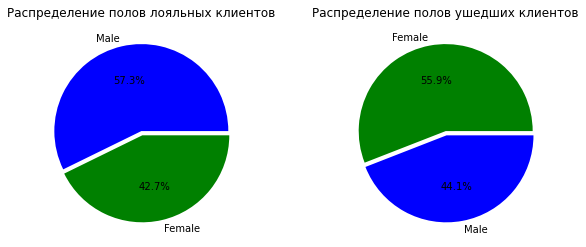

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].pie(
    churn_data[churn_data.Exited == 0].Gender.value_counts(),
    labels=churn_data[churn_data.Exited == 0].Gender.value_counts().index,
    autopct='%.1f%%',
    colors=['blue','green'],
    explode=[0, 0.05]
)
axes[0].set_title('Распределение полов лояльных клиентов')

axes[1].pie(
    churn_data[churn_data.Exited == 1].Gender.value_counts(),
    labels=churn_data[churn_data.Exited == 1].Gender.value_counts().index,
    autopct='%.1f%%',
    colors=['green','blue'],
    explode=[0, 0.05]
)
axes[1].set_title('Распределение полов ушедших клиентов')

Здесь наглядно видно, что женщины менее лояльны к банку, чем мужчины. Интересно посмотреть взаимосвязь с манерой предоставления услуг банком и взаимодействием с клиетами. (А возможно это просто банк Открытие, который сотрудничает со Спартаком и привлекает болельщиков-мужчин!)

#### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

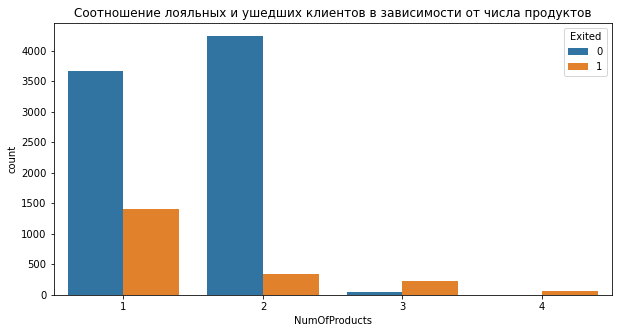

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(
    data=churn_data.groupby('NumOfProducts', as_index=False).Exited.value_counts(),
    x='NumOfProducts',
    y='count',
    hue='Exited')
axes.set_title('Соотношение лояльных и ушедших клиентов в зависимости от числа продуктов');

Здесь интересная ситуация - люди, пользующиеся продуктами банка меньше - более лояльны. С другой стороны - здесь вопрос к данным. Исторически накопленным итогом приобретавшие услуги? Тогда - на этапе первой услуги уходит четверть, дальше вторая услуга наращивает лояльность. При обращении за дальнейщими услугами возникает явный тред к закрытию счетов.

#### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

Text(0.5, 1.0, 'Соотношение лояльных и ушедших клиентов в зависимости от участия в программе лояльности')

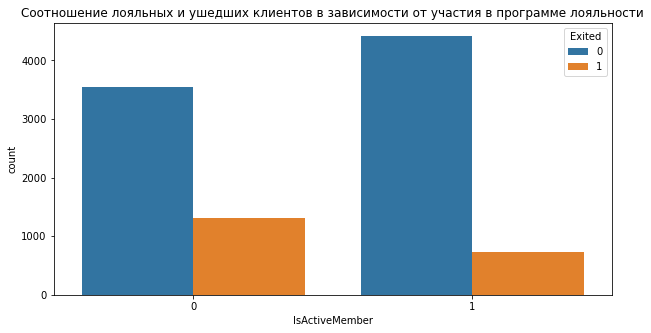

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(
    data=churn_data.groupby('IsActiveMember', as_index=False).Exited.value_counts(),
    x='IsActiveMember',
    y='count',
    hue='Exited')
axes.set_title('Соотношение лояльных и ушедших клиентов в зависимости от участия в программе лояльности')

Видим, что статус активного клиента имеет прмую зависимость с лояльстью к банку. (Но в купе с пунктом выше - эта актиность скорее всего ограничена 2 продуктами)

#### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [30]:
churn_data_geo = churn_data.groupby('Geography')[['Exited']].mean()

fig = px.choropleth(
    data_frame=churn_data_geo, 
    locations=churn_data_geo.index, 
    locationmode = "country names", 
    color="Exited",
    range_color=[0, 0.5], 
    title='Доля ушедших клиентов по странам', 
    width=800, 
    height=600, 
    color_continuous_scale='tealrose'
)

#отображаем график
fig.show()

Видим, что Франция и Испания удеживают клиентов лучше, чем Германия. Это может быть свзано с многими особенностями, историей работы банка в стране и клиентской базой в каждой стране.

#### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [31]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

Text(0.5, 1.0, 'Тепловая карта уходящих клиентов в зависимости от кредитного рейтинга и стажа в банке')

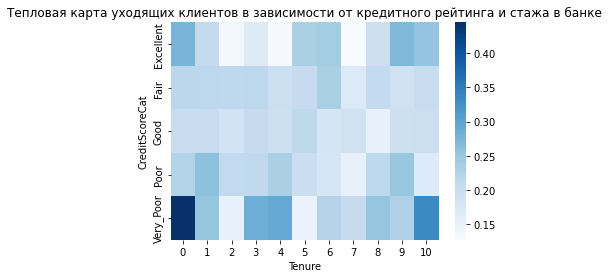

In [39]:
churn_data['CreditScoreCat'] = churn_data.CreditScore.apply(lambda x: get_credit_score_cat(x))
pivot = churn_data.groupby(['Tenure', 'CreditScoreCat'], as_index=False).Exited.mean().pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat')

heatmap = sns.heatmap(data=pivot, cmap='Blues')
heatmap.set_title('Тепловая карта уходящих клиентов в зависимости от кредитного рейтинга и стажа в банке')

- Сразу бросается в глаза, что клиенты с самым низким рейтингом уходят чаще. Более того, в самом начале (в первый год) Думаю, это происхолит после того, как они получат новости о присвоении рейтинга. 
- Как ни странно, клиенты с очень высоким рейтингом тоже уходят в первый год. Думаю, здесь применима обратная завиимость для объяснения - они не успевают провалиться в кредитном рейтинге и выплачивают короткий кредит и закрывают счет.
- тем не менее, клменты с зорошим рейтингом имеют больше всего шансов на то, чтобы остаться начиная со второго года.

